## Employee Attrition Analysis

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

**Uploading the dataset**

In [2]:
emp_df = pd.read_csv('DS1_C5_S2_EmployeeAttrition_Data_Practice.csv')

In [3]:
emp_df.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8
1469,34.0,No,Travel_Rarely,Research & Development,8,Medical,2068,2,Male,82,...,No,3,1,6,3,4,4,3,1,2


In [4]:
emp_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
emp_df.shape

(1470, 27)

In [6]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1446 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1440 non-null   object 
 3   Department                1466 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   EducationField            1458 non-null   object 
 6   EmployeeNumber            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1425 non-null   object 
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobRole                   1460 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1414 non-null   object 
 14  MonthlyI

In [7]:
emp_df.isnull().sum()

Age                         24
Attrition                    0
BusinessTravel              30
Department                   4
DistanceFromHome             0
EducationField              12
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                      45
HourlyRate                   0
JobInvolvement               0
JobRole                     10
JobSatisfaction              0
MaritalStatus               56
MonthlyIncome                0
NumCompaniesWorked           0
Over18                      54
OverTime                     0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

Null values detected

**Creating two columns to divide the data into Categorial and Continous Values.**

In [9]:
def data_types(df):
    cat_var=[]
    con_var=[]
    
    
    for col in df:
        if df[col].nunique()<30:
            cat_var.append(col)
        else:
            con_var.append(col)
    return cat_var,con_var 



categorical_var,continous_var = data_types(emp_df)
print(tabulate({"cat_var":categorical_var,"con_var":continous_var},headers=["Categorical", "Continous"]))

Categorical               Continous
------------------------  -----------------
Attrition                 Age
BusinessTravel            EmployeeNumber
Department                HourlyRate
DistanceFromHome          MonthlyIncome
EducationField            TotalWorkingYears
EnvironmentSatisfaction   YearsAtCompany
Gender
JobInvolvement
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TrainingTimesLastYear
WorkLifeBalance
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


**Task1**

Business Travel

In [10]:
emp_df['BusinessTravel'].value_counts()
emp_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

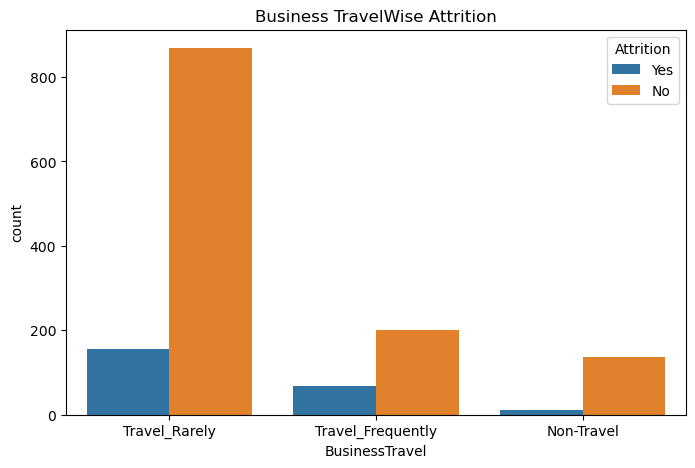

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='BusinessTravel',hue='Attrition',data=emp_df)
plt.title("Business TravelWise Attrition")
plt.show()

From the above graph we see that people who Travel_rarely have mostly existed from the company.

EducationField

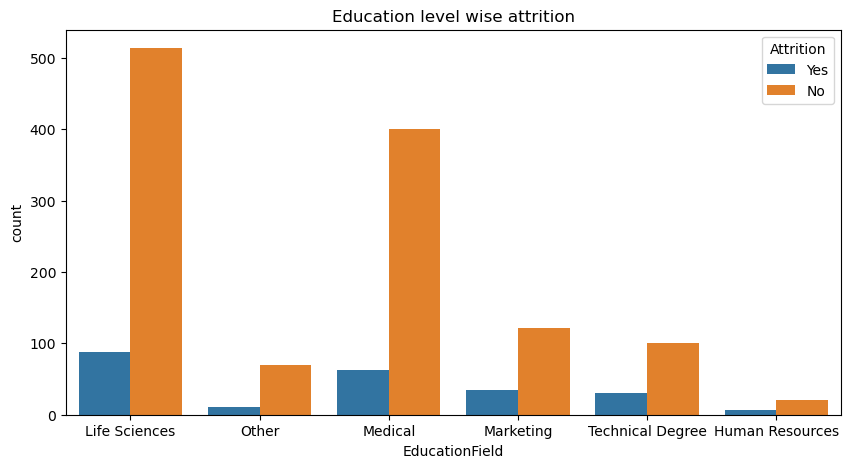

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='EducationField',hue='Attrition',data=emp_df)
plt.title("Education level wise attrition")
plt.show()

Life Sciences and Medical have more attrition

**Department**

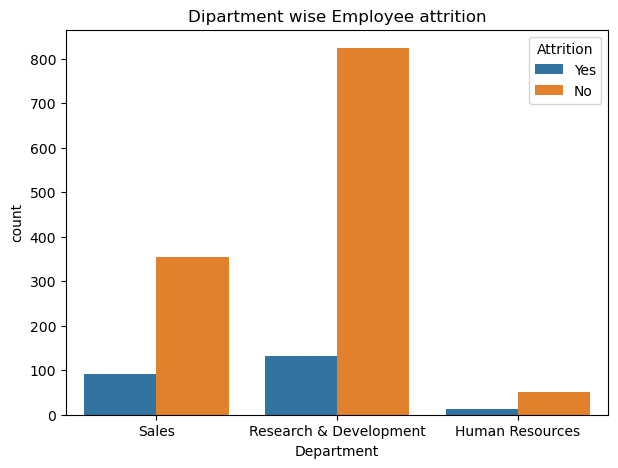

In [13]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x='Department',hue='Attrition',data=emp_df)
plt.title("Dipartment wise Employee attrition")
plt.show()

RND has more attrition

**EnvironmentSatisfaction**

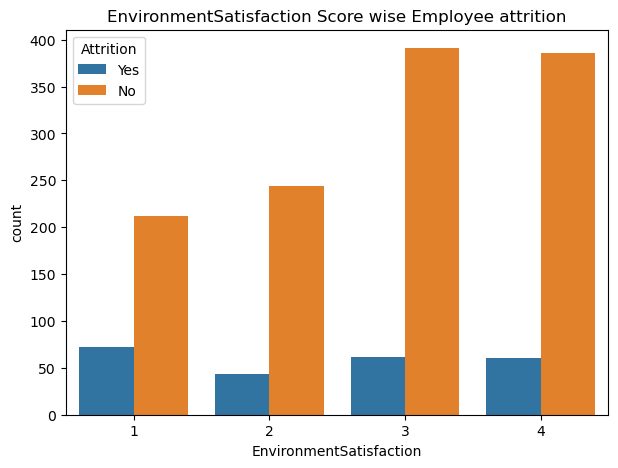

In [14]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=emp_df)
plt.title("EnvironmentSatisfaction Score wise Employee attrition")
plt.show()

Employee with score 1 has more attrition

**Gender**

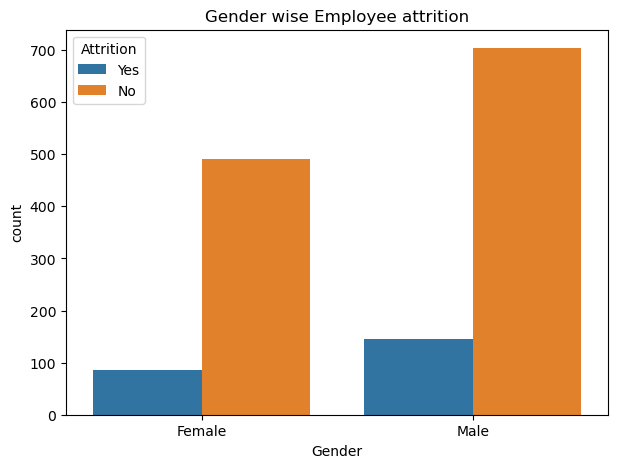

In [15]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x='Gender',hue='Attrition',data=emp_df)
plt.title("Gender wise Employee attrition")
plt.show()

Males have more Attrition

**MaritalStatus**

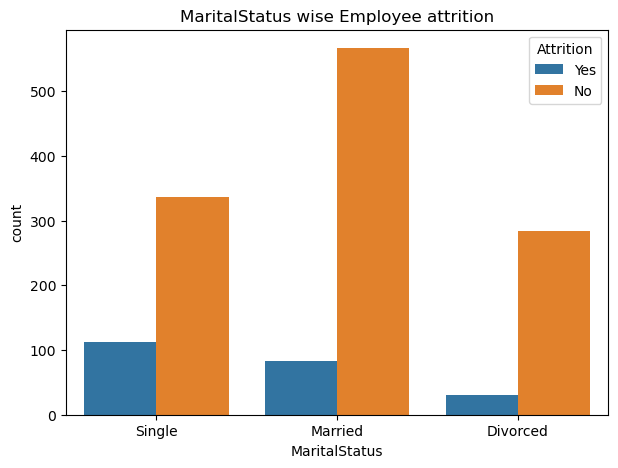

In [16]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x='MaritalStatus',hue='Attrition',data=emp_df)
plt.title("MaritalStatus wise Employee attrition")
plt.show()

Singles have more attrition

**OverTime**

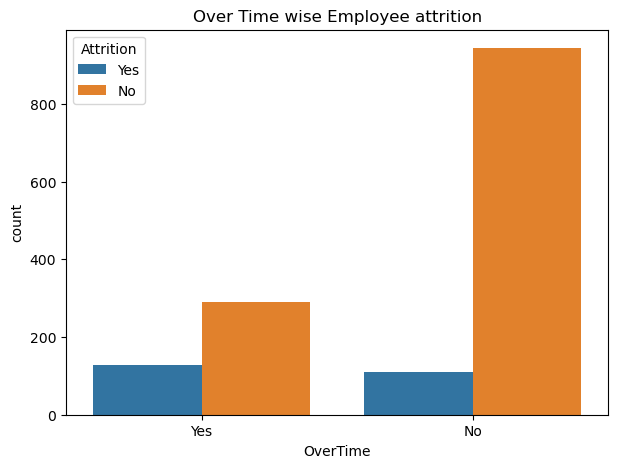

In [17]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x='OverTime',hue='Attrition',data=emp_df)
plt.title("Over Time wise Employee attrition")
plt.show()

The employees doing Over Time have more Attrition than those who don't.

**PerformanceRating**

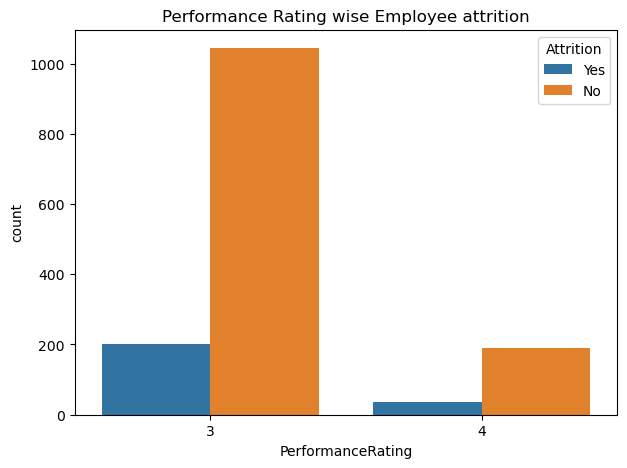

In [18]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x='PerformanceRating',hue='Attrition',data=emp_df)
plt.title("Performance Rating wise Employee attrition")
plt.show()

Employees with performance rating 3 will more likely to leave.

**JobSatisfaction**

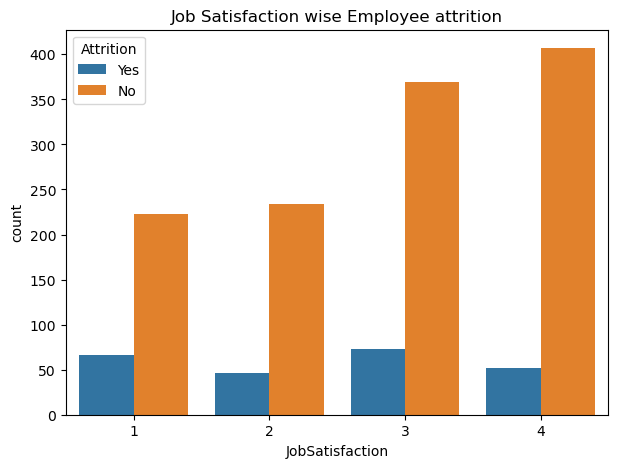

In [19]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x='JobSatisfaction',hue='Attrition',data=emp_df)
plt.title("Job Satisfaction wise Employee attrition")
plt.show()

Employees with satisfaction 1 or 3 will more likely to leave.

**Task2**

Age

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

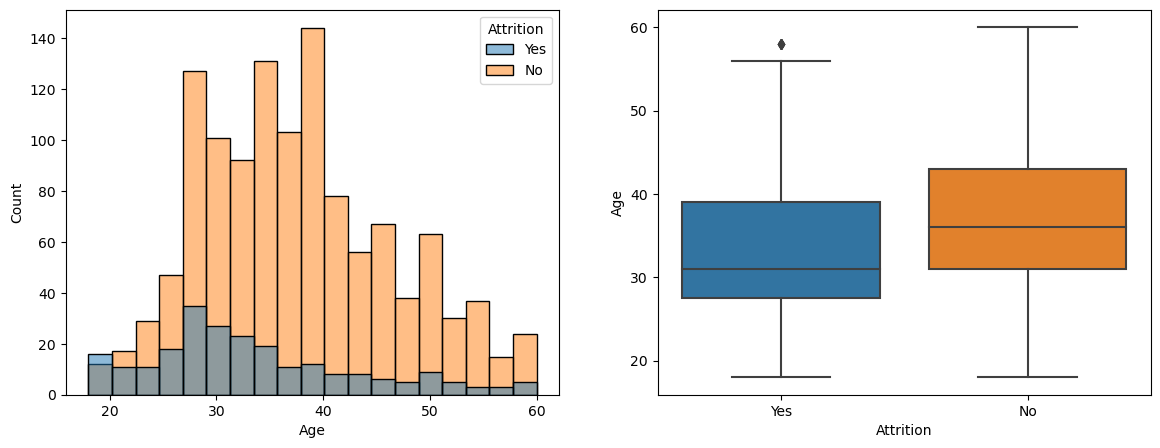

In [20]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =emp_df['Age'], hue=emp_df['Attrition'],ax=ax[0])
sns.boxplot(y =emp_df['Age'], x=emp_df['Attrition'],ax=ax[1])

**Outliers Detected and cleared**

In [24]:
emp_df.loc[emp_df['Age']>50, 'Age']=emp_df['Age'].mean()

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

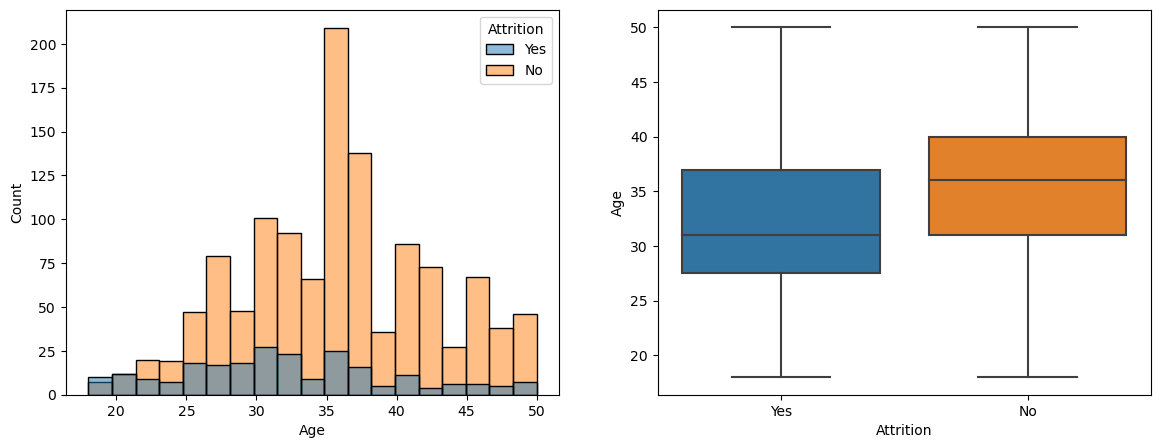

In [25]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =emp_df['Age'], hue=emp_df['Attrition'],ax=ax[0])
sns.boxplot(y =emp_df['Age'], x=emp_df['Attrition'],ax=ax[1])

Employees between age 28-40 more likely to leave.

**HourlyRate**

<AxesSubplot:xlabel='Attrition', ylabel='HourlyRate'>

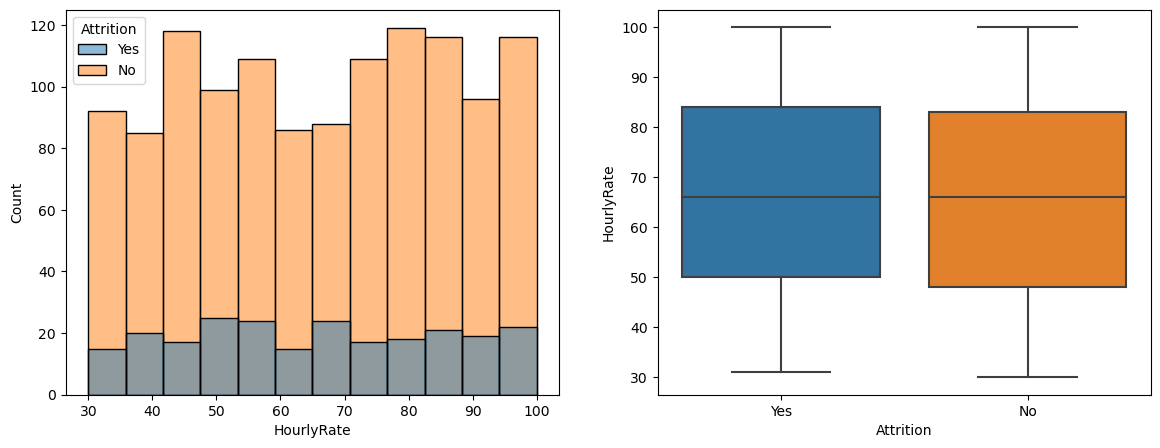

In [26]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =emp_df['HourlyRate'], hue=emp_df['Attrition'],ax=ax[0])
sns.boxplot(y =emp_df['HourlyRate'], x=emp_df['Attrition'],ax=ax[1])

Not related.

**MonthlyIncome**

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

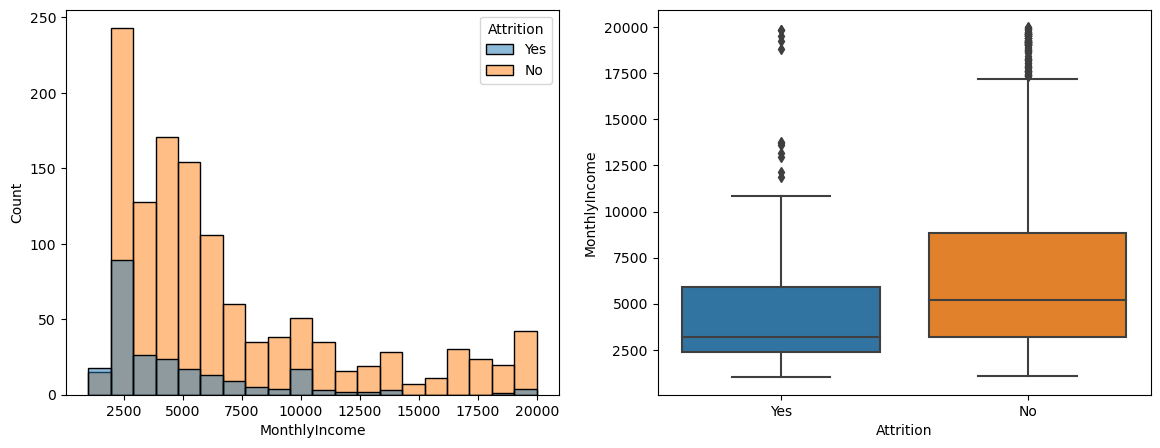

In [27]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =emp_df['MonthlyIncome'], hue=emp_df['Attrition'],ax=ax[0])
sns.boxplot(y =emp_df['MonthlyIncome'], x=emp_df['Attrition'],ax=ax[1])

Outliers detected

In [29]:
emp_df.loc[emp_df['MonthlyIncome']>11000, 'MonthlyIncome']=emp_df['MonthlyIncome'].mean()

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

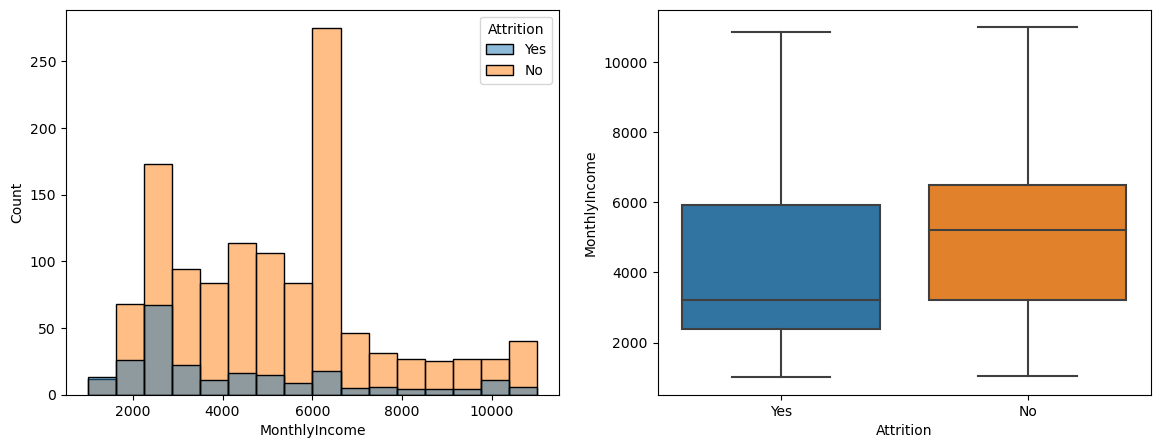

In [30]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =emp_df['MonthlyIncome'], hue=emp_df['Attrition'],ax=ax[0])
sns.boxplot(y =emp_df['MonthlyIncome'], x=emp_df['Attrition'],ax=ax[1])

Employees with monthly income around 3000 more likely to leave. 75% of the people have income greater than the rest 50% . the people who have lower income can leave the bank.

**DistanceFromHome**

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

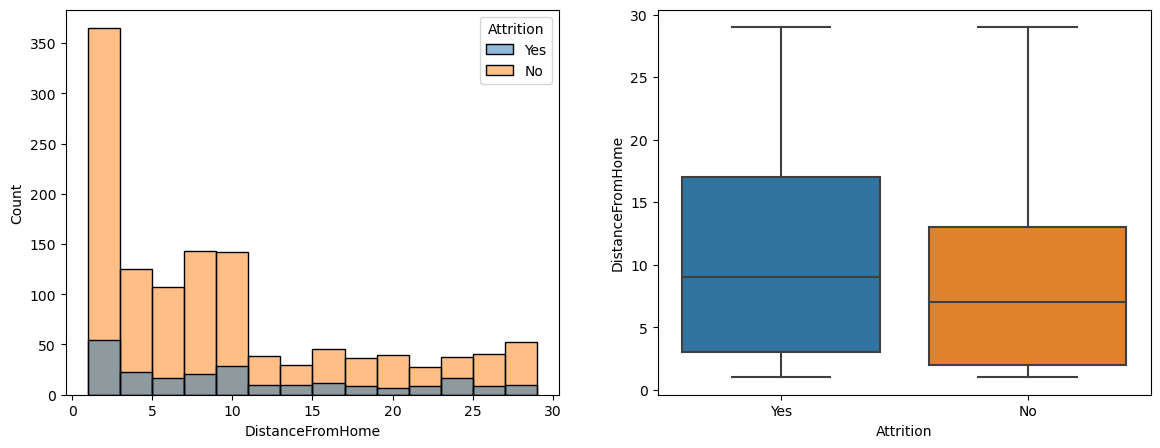

In [31]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =emp_df['DistanceFromHome'], hue=emp_df['Attrition'],ax=ax[0])
sns.boxplot(y =emp_df['DistanceFromHome'], x=emp_df['Attrition'],ax=ax[1])

people travel more distance seem to have higher attrition. longer distance have high attrition rate.

**TotalWorkingYears**

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

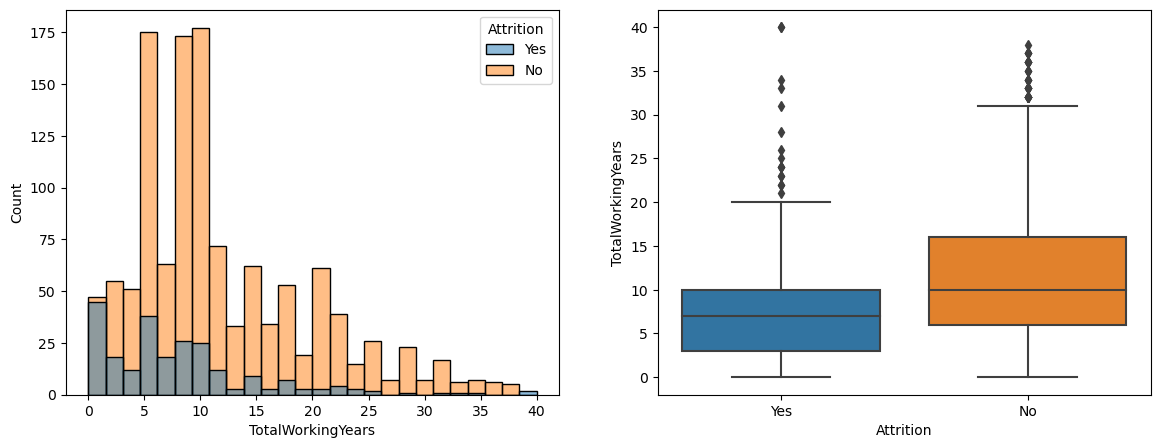

In [32]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =emp_df['TotalWorkingYears'], hue=emp_df['Attrition'],ax=ax[0])
sns.boxplot(y =emp_df['TotalWorkingYears'], x=emp_df['Attrition'],ax=ax[1])

Outliers detected

In [33]:
emp_df.loc[emp_df['TotalWorkingYears']>20, 'TotalWorkingYears']=emp_df['TotalWorkingYears'].mean()

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

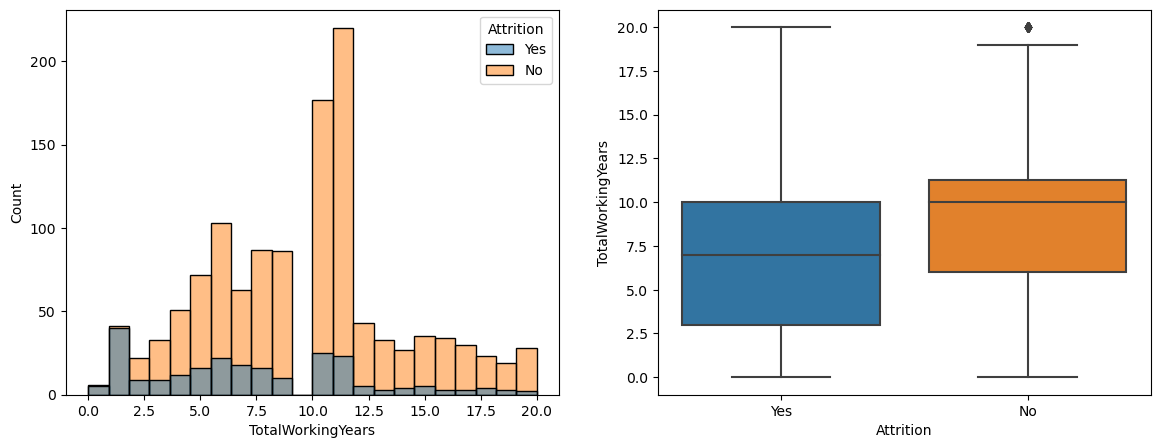

In [34]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =emp_df['TotalWorkingYears'], hue=emp_df['Attrition'],ax=ax[0])
sns.boxplot(y =emp_df['TotalWorkingYears'], x=emp_df['Attrition'],ax=ax[1])

.People with less exp seems to leave the job.

**Task3**

In [36]:
t3 = emp_df[(emp_df['BusinessTravel']=='Travel_Rarely')&(emp_df['Attrition']=='Yes')]

In [38]:
d1 = t3['JobRole']

In [39]:
d1

0             Sales Executive
2       Laboratory Technician
14      Laboratory Technician
21       Sales Representative
24         Research Scientist
                ...          
1390    Laboratory Technician
1396          Sales Executive
1442       Research Scientist
1444    Laboratory Technician
1461          Sales Executive
Name: JobRole, Length: 155, dtype: object

In [40]:
d1.value_counts()

Laboratory Technician        44
Sales Executive              39
Research Scientist           28
Sales Representative         18
Human Resources               8
Manufacturing Director        7
Healthcare Representative     5
Manager                       4
Research Director             2
Name: JobRole, dtype: int64

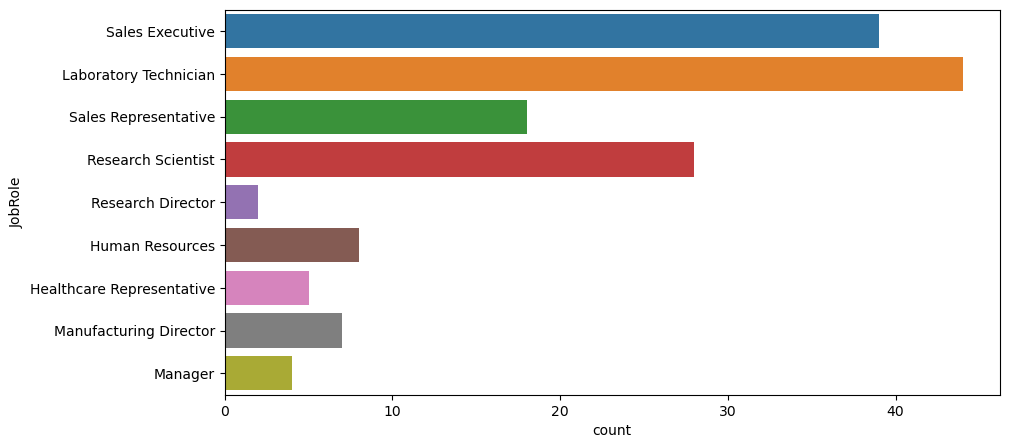

In [41]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='JobRole',data=t3,orient='h')
plt.show()

From the above graph we can see that **Laboratory Technician** are more likely to leave the job.

**Task4**

In [42]:
emp_df['EducationField'].value_counts()

Life Sciences       602
Medical             463
Marketing           155
Technical Degree    130
Other                81
Human Resources      27
Name: EducationField, dtype: int64

In [49]:
t4 = emp_df[(emp_df['Attrition']=='Yes')&(emp_df['EducationField']=='Life Sciences')|(emp_df['EducationField']=='Medical')]

In [50]:
t4

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.000000,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8.0,0,1,6,4,0,5
4,27.000000,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6.0,3,3,2,2,2,2
6,36.930152,No,Travel_Rarely,Research & Development,3,Medical,10,3,Female,81,...,Yes,4,1,12.0,3,2,1,0,0,0
9,36.000000,No,Travel_Rarely,Research & Development,27,Medical,13,3,Male,94,...,No,3,2,17.0,3,2,7,7,7,7
10,35.000000,No,Travel_Rarely,Research & Development,16,Medical,14,1,Male,84,...,No,3,3,6.0,5,3,5,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31.000000,No,Non-Travel,Research & Development,5,Medical,2057,2,Male,74,...,No,3,2,10.0,2,3,9,4,1,7
1465,36.000000,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17.0,3,3,5,2,0,3
1466,39.000000,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9.0,5,3,7,7,1,7
1468,49.000000,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17.0,3,2,9,6,0,8


In [51]:
d2=t4['JobRole']

In [52]:
d2

0                 Sales Executive
4           Laboratory Technician
6           Laboratory Technician
9       Healthcare Representative
10          Laboratory Technician
                  ...            
1463       Manufacturing Director
1465        Laboratory Technician
1466    Healthcare Representative
1468              Sales Executive
1469        Laboratory Technician
Name: JobRole, Length: 551, dtype: object

In [53]:
d2.value_counts()

Laboratory Technician        131
Research Scientist           118
Sales Executive               84
Manufacturing Director        57
Healthcare Representative     50
Research Director             35
Manager                       33
Sales Representative          27
Human Resources               12
Name: JobRole, dtype: int64

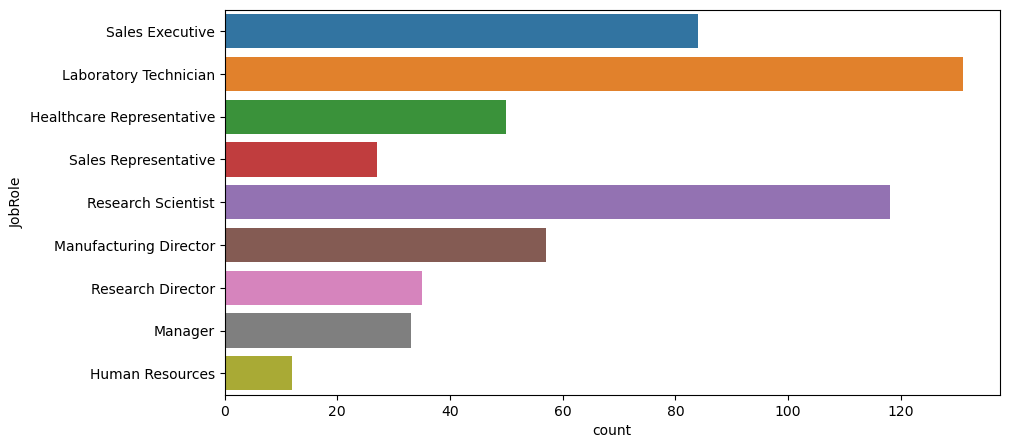

In [54]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='JobRole',data=t4,orient='h')
plt.show()

From the analysis above **Laboratory Technician and Research Scientist** are more like to leave the company.

**Task5**

In [56]:
t5 = emp_df[(emp_df['Attrition']=='Yes') & (emp_df['Department']=='Sales')]

In [59]:
t5

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.000000,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8.0,0,1,6,4,0,5
21,36.000000,Yes,Travel_Rarely,Sales,9,Life Sciences,27,3,Male,82,...,No,4,2,10.0,4,3,5,3,0,3
33,39.000000,Yes,Travel_Rarely,Sales,5,Technical Degree,42,4,Male,56,...,No,3,3,19.0,6,4,1,0,0,0
36,50.000000,Yes,Travel_Rarely,Sales,3,Marketing,47,1,Male,86,...,Yes,3,3,3.0,2,3,3,2,0,2
89,46.000000,Yes,Travel_Rarely,Sales,9,Medical,118,3,Male,64,...,No,3,4,9.0,3,3,9,8,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,31.000000,Yes,Travel_Frequently,Sales,26,Marketing,1967,1,Male,63,...,Yes,3,3,10.0,4,3,10,7,0,8
1396,36.253608,Yes,Travel_Rarely,Sales,24,Life Sciences,1968,1,Male,66,...,Yes,3,2,15.0,2,2,2,2,2,2
1438,23.000000,Yes,Travel_Frequently,Sales,9,Marketing,2023,4,Male,33,...,No,3,1,1.0,3,2,1,0,1,0
1452,50.000000,Yes,NaN,Sales,1,Life Sciences,2044,2,Male,94,...,No,3,4,12.0,3,3,6,3,0,1


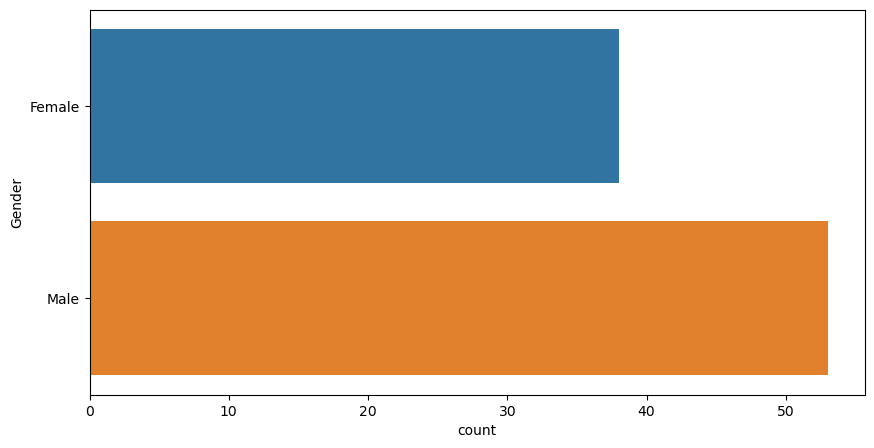

In [58]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(y='Gender',data=t5,orient='h')
plt.show()

From the above analysis we found that employees from Sales Department who are Males are more likely to leave the Company.